# Importing library

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [197]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [198]:
df.shape

(614, 13)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [200]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [201]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [202]:
df.drop('Loan_ID',axis=1,inplace=True)

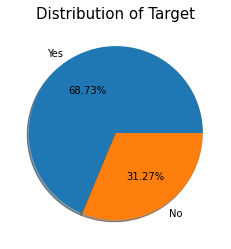

In [203]:
val=df['Loan_Status'].value_counts().to_list()
lab=['Yes','No']
plt.title('Distribution of Target',fontsize=15)
plt.pie(x=val,labels=lab,autopct='%1.2f%%',shadow=True)
plt.show()

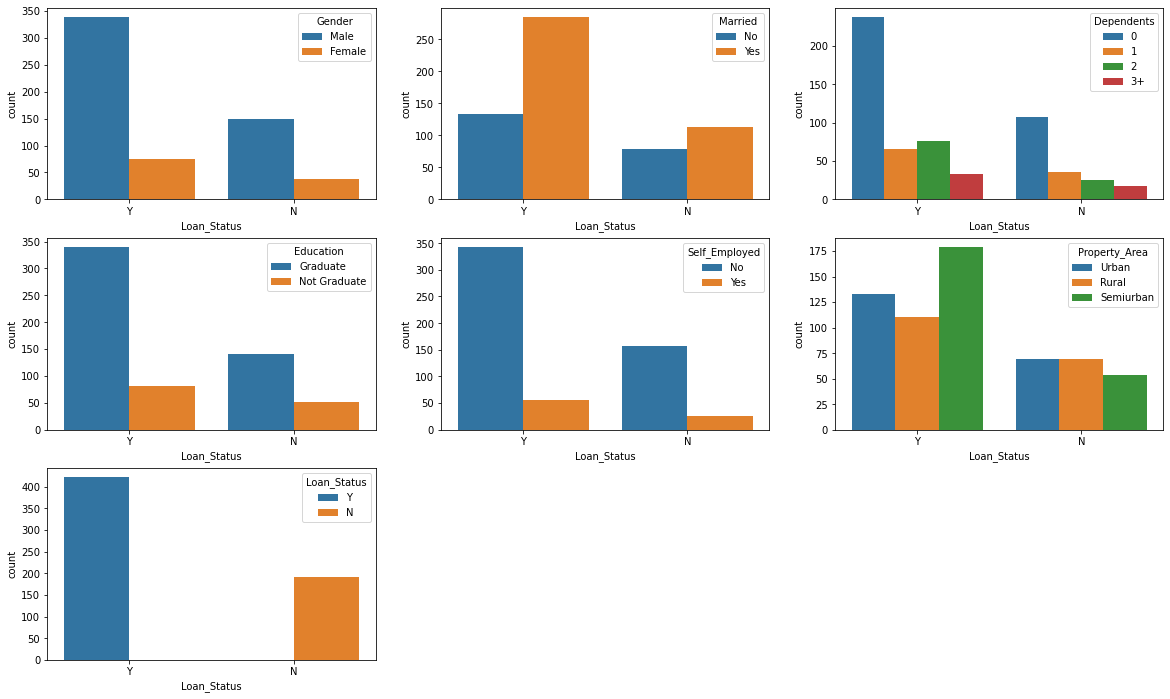

In [204]:
dj=df[:-1].select_dtypes('object')
plt.figure(figsize=(20,12))
plot=1
for i in dj:
    if df[i].dtypes=='object':
        if plot<=9:
            plt.subplot(3,3,plot)
            sns.countplot(x=df['Loan_Status'],hue=i,data=df)
            
    plot+=1
plt.show()    

In [205]:
for i in dj:
    print(i)
    print('--'*5)
    print(dj[i].value_counts())
    print('---'*15)

Gender
----------
Male      489
Female    111
Name: Gender, dtype: int64
---------------------------------------------
Married
----------
Yes    398
No     212
Name: Married, dtype: int64
---------------------------------------------
Dependents
----------
0     344
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------------------------------------------
Education
----------
Graduate        479
Not Graduate    134
Name: Education, dtype: int64
---------------------------------------------
Self_Employed
----------
No     500
Yes     81
Name: Self_Employed, dtype: int64
---------------------------------------------
Property_Area
----------
Semiurban    232
Urban        202
Rural        179
Name: Property_Area, dtype: int64
---------------------------------------------
Loan_Status
----------
Y    422
N    191
Name: Loan_Status, dtype: int64
---------------------------------------------


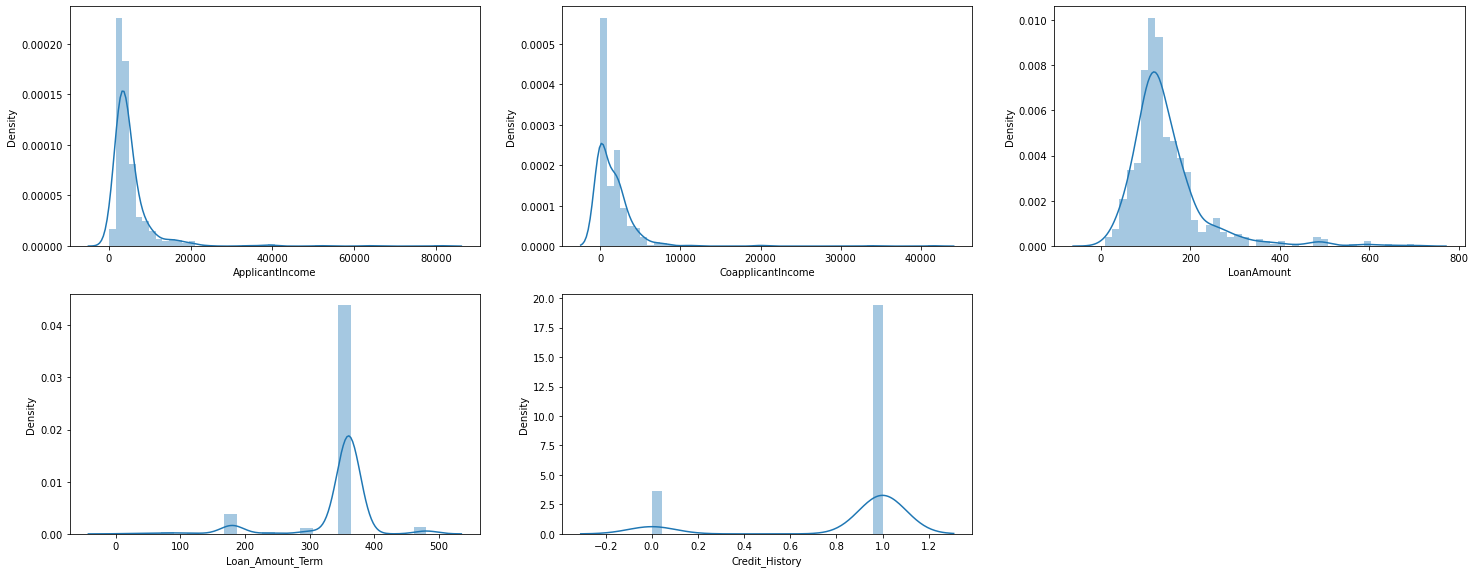

In [206]:
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(25,15))
plot=1
for i in di:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.distplot(df[i])
            
    plot+=1
plt.show()    


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

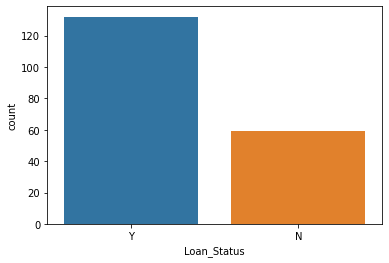

In [207]:
sns.countplot(x='Loan_Status',data=df[df["ApplicantIncome"]>5000])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

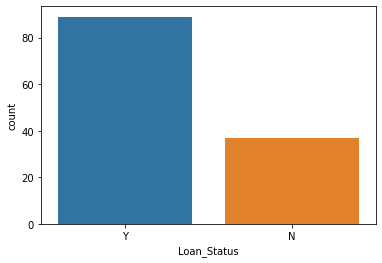

In [208]:
sns.countplot(x='Loan_Status',data=df[(df['ApplicantIncome']>5000)&(df['CoapplicantIncome']==0)])

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

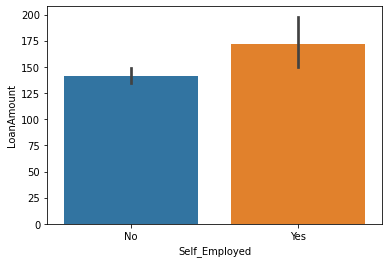

In [209]:
sns.barplot(x='Self_Employed',y='LoanAmount',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

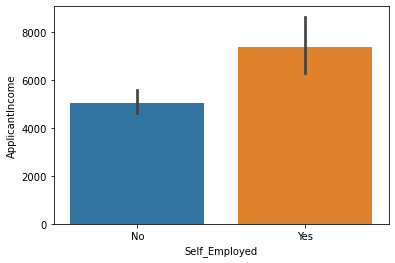

In [210]:
sns.barplot(y='ApplicantIncome',x='Self_Employed',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

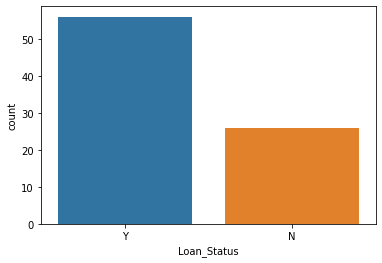

In [211]:
sns.countplot(x='Loan_Status',data=df[df['Self_Employed']=='Yes'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

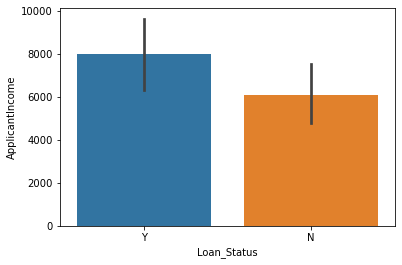

In [212]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df[df['Self_Employed']=='Yes'])

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

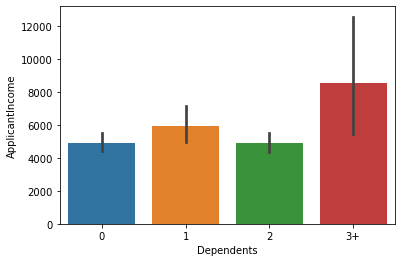

In [213]:
sns.barplot(x='Dependents',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

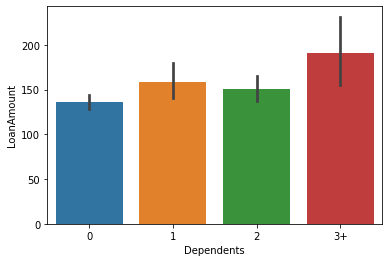

In [143]:
sns.barplot(x='Dependents',y='LoanAmount',data=df)

In [219]:
### Lets Impute the null values
for col in df.columns:
    if df[col].dtypes=='object' and df[col].isnull().sum()>0:
        df.loc[df['Loan_Status']=='Y',[col]]=df.loc[df['Loan_Status']=='Y',[col]].fillna(df.loc[df['Loan_Status']=='Y',[col]].mode().iloc[0])
        df.loc[df['Loan_Status']=='N',[col]]=df.loc[df['Loan_Status']=='N',[col]].fillna(df.loc[df['Loan_Status']=='N',[col]].mode().iloc[0])
        

In [220]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [221]:
df.loc[df['Loan_Status']=='Y',['LoanAmount']]=df.loc[df['Loan_Status']=='Y',['LoanAmount']].fillna(df.loc[df['Loan_Status']=='Y',['LoanAmount']].mean())


df.loc[df['Loan_Status']=='N',['LoanAmount']]=df.loc[df['Loan_Status']=='N',['LoanAmount']].fillna(df.loc[df['Loan_Status']=='N',['LoanAmount']].mean())

In [223]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [224]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df.loc[df['Loan_Status']=='Y',[col]]=df.loc[df['Loan_Status']=='Y',[col]].fillna(df.loc[df['Loan_Status']=='Y',[col]].mode().iloc[0])
        df.loc[df['Loan_Status']=='N',[col]]=df.loc[df['Loan_Status']=='N',[col]].fillna(df.loc[df['Loan_Status']=='N',[col]].mode().iloc[0])
        

In [225]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

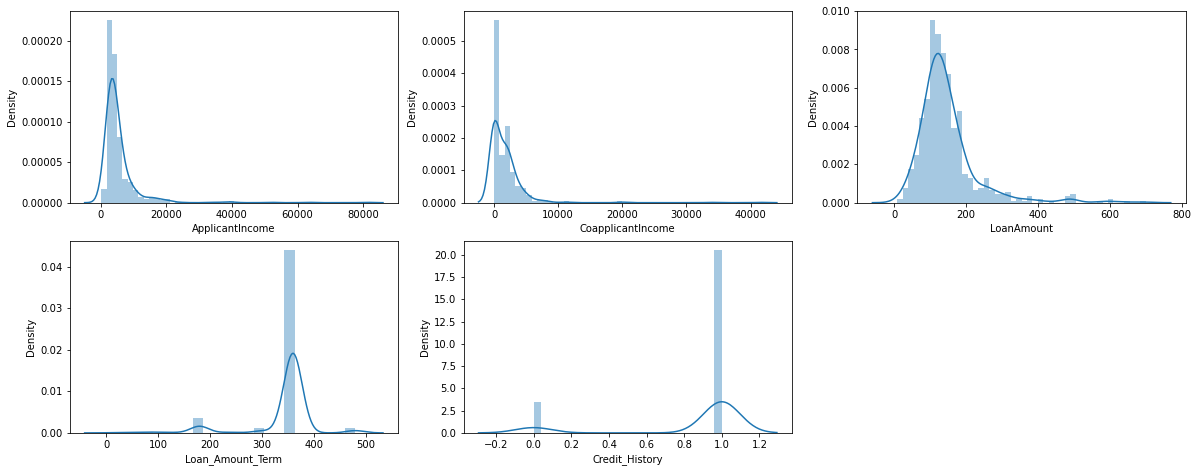

In [228]:
plt.figure(figsize=(20,12))
plot=1
for i in di:
    if plot<=6:
        plt.subplot(3,3,plot)
        sns.distplot(df[i])
    plot+=1 
plt.show()    
    

In [229]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [231]:
for i in di:
    if df[i].skew()>.5:
        df[i]=np.log1p(df[i])

In [234]:
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [236]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [240]:
##Dividing Into input & output
x=df.drop('Loan_Status',axis=1)
y=df[['Loan_Status']]

In [242]:
x=pd.get_dummies(x,drop_first=True)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.978762,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,1.0,0,0,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,360.0,1.0,1,1,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,360.0,1.0,1,1,0,1,0,0,0,0,1


In [244]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [247]:
## SCALING
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [248]:
x_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.516186,-1.107783,0.219058,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,0.137806,0.782158,-0.023164,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.519479,-1.107783,-1.357210,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.751605,0.897526,-0.153534,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.555727,-1.107783,0.172355,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572062,-1.107783,-1.210647,0.273231,0.411733,-2.117107,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.032679,-1.107783,-2.357298,-2.522836,0.411733,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,1.015921,0.308483,1.356500,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.918972,-1.107783,0.743782,0.273231,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [258]:
## Since it is an imbalance dataset so we will focus on Roc-Auc Score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
def max_rocauc_score(clf,x,y):
    max_rocauc_score=0
    
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=r_state,stratify=y)
        x_train,y_train=SMOTE().fit_resample(x_train,y_train)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        roc_auc=roc_auc_score(y_test,y_pred)
        if roc_auc>max_rocauc_score:
            max_rocauc_score=roc_auc
            final_r_stat=r_state
    print('max roc_auc socre is at',final_r_stat,'is',max_rocauc_score)
    

In [259]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
max_rocauc_score(lg_clf,x,y)

max roc_auc socre is at 42 is 0.8109907120743034


In [268]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
max_rocauc_score(dt_clf,x,y)

max roc_auc socre is at 96 is 0.7611455108359133


In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rd_clf=RandomForestClassifier()
param={'n_estimators':[10,100,500]}
clf=GridSearchCV(rd_clf,param_grid=param,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [273]:
rf_clf=RandomForestClassifier(n_estimators=100)
max_rocauc_score(rf_clf,x,y)

max roc_auc socre is at 42 is 0.7569659442724458


In [274]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
param={'n_neighbors':[10,15,20]}
clf=GridSearchCV(knn_clf,param,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 20}

In [275]:
knn_clf=KNeighborsClassifier(n_neighbors=20)
max_rocauc_score(knn_clf,x,y)

max roc_auc socre is at 69 is 0.7334365325077399


In [277]:
from sklearn.svm import SVC
svc_clf=SVC()
param={'kernel':['linear','rbf','poly'],'C':[.001,.01,1,10]}
clf=GridSearchCV(svc_clf,param,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [282]:
svc_clf=SVC(C=10,kernel='linear')
max_rocauc_score(svc_clf,x,y)

max roc_auc socre is at 99 is 0.796749226006192


In [285]:
from sklearn.ensemble import GradientBoostingClassifier
gd_clf=GradientBoostingClassifier()
param={'learning_rate':[.001,.01,1,10],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gd_clf,param,cv=5,scoring='roc_auc')
clf.fit(x_scaled,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [286]:
gd_clf=GradientBoostingClassifier(learning_rate=.001,n_estimators=500)
max_rocauc_score(gd_clf,x,y)

max roc_auc socre is at 99 is 0.7704334365325077


In [295]:
## AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ad_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
max_rocauc_score(ad_clf,x,y)

max roc_auc socre is at 42 is 0.7434984520123838


In [324]:
### Cross Validation
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x_scaled,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))
   

Mean roc auc score for logistic classifier:  0.7682755153343389
standard deviation in roc auc score for logistic classifier:  0.05280802330572407
[0.82600619 0.73157895 0.77167277 0.83821734 0.70112782]


In [313]:
## Decison Tree
print("Mean roc auc score for Decision Tree: ",cross_val_score(dt_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(dt_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dt_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for Decision Tree:  0.6742375168690957
standard deviation in roc auc score for logistic classifier:  0.032746269498630014
[0.69256966 0.62956656 0.68086081 0.73901099 0.65507519]


In [322]:
## random forest
print("Mean roc auc score for RandomForest classifier: ",cross_val_score(rd_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(rd_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rd_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for RandomForest classifier:  0.7860076851253321
standard deviation in roc auc score for logistic classifier:  0.04011487078676548
[0.79566563 0.73328173 0.78418803 0.8221917  0.74185464]


In [325]:
###Knn
print("Mean roc auc score for KNN classifier: ",cross_val_score(knn_clf,x_scaled,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(knn_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(knn_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for KNN classifier:  0.7329380861656405
standard deviation in roc auc score for logistic classifier:  0.029306377257307243
[0.71037152 0.68529412 0.76007326 0.73901099 0.68687343]


In [326]:
###Svm
print("Mean roc auc score for SVM classifier: ",cross_val_score(svc_clf,x_scaled,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(svc_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for SVM classifier:  0.691614481150085
standard deviation in roc auc score for logistic classifier:  0.05256207436314522
[0.81919505 0.70619195 0.75793651 0.81196581 0.69110276]


In [320]:
print("Mean roc auc score for gradient boost classifier: ",cross_val_score(gd_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(gd_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gd_clf,x,y,cv=5,scoring="roc_auc"))


Mean roc auc score for gradient boost classifier:  0.7548620419827851
standard deviation in roc auc score for logistic classifier:  0.07344431188808453
[0.78018576 0.64334365 0.73427961 0.87057387 0.74592732]


In [319]:
print("Mean roc auc score for Adaboost classifier: ",cross_val_score(ad_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(ad_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(ad_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for Adaboost classifier:  0.6626136608489549
standard deviation in roc auc score for logistic classifier:  0.0384725085192074
[0.69256966 0.57972136 0.66208791 0.70238095 0.6716792 ]


In [328]:
## we will use RandomForest as our final model
from sklearn.ensemble import RandomForestClassifier
rd_clf=RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)
x_train,y_train=SMOTE().fit_resample(x_train,y_train)
rd_clf.fit(x_train,y_train)
y_pred=rd_clf.predict(x_test)
roc_auc=roc_auc_score(y_test,y_pred)


In [329]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[27 11]
 [10 75]]
f1 score is :  0.8771929824561403
classification report 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.87      0.88      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.80      0.80       123
weighted avg       0.83      0.83      0.83       123

AUC ROC Score:  0.7964396284829721


In [331]:
#Saving our model
import pickle
file='loan_prediction_rf.pkl'
pickle.dump(rd_clf,open(file,'wb'))